### Importing Data

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#### Data Loading

In [3]:
# Importing Dtaset to CSV file

lead = pd.read_csv(r'C:\Users\Gayatri\Desktop\UpGrad\Data Toolkit\Machine Learning\LogisticRegression\Lead+Scoring+Case+Study\Leads.csv')

In [4]:
pd.set_option('display.max_columns', None)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Data Inspection

In [5]:
#Check Basic Information About Data

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Check the Total Rows & Columns (dimensions) of Dataset

lead.shape

(9240, 37)

In [7]:
# Check the Statastical Aspects of Dataframe

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
 # Chek the null values

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Check the Percentage of null values per column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### 2. Data Preparation

From the above observation our next task is :

1. Encoding categorical variables
2. Handling missing value 
3. Convert the Select into the NaN
4. Dropping columns having more than null values


#### Converting some binary variables (Yes/No) to 0/1

In [10]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [11]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### Converting SELECTs into NaN

In [12]:
# Listing the categorical variables yet to be encoded

lead.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [13]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

lead = lead.replace('Select', np.nan)

#### Missing Value Handling

In [14]:
#dropping Lead Number and Prospect ID since they have all unique values

lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score') hence we will drop these columns with very high percentage of missing data.

In [15]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [16]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [17]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Get updates on DM Content'].value_counts()

0    9240
Name: Get updates on DM Content, dtype: int64

In [18]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Newspaper Article'].value_counts()

0    9238
1       2
Name: Newspaper Article, dtype: int64

In [19]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Magazine'].value_counts()

0    9240
Name: Magazine, dtype: int64

In [20]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['I agree to pay the amount through cheque'].value_counts()

0    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [21]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Receive More Updates About Our Courses'].value_counts()

0    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [22]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Update me on Supply Chain Content'].value_counts()

0    9240
Name: Update me on Supply Chain Content, dtype: int64

In [23]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Newspaper'].value_counts()

0    9239
1       1
Name: Newspaper, dtype: int64

In [24]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Through Recommendations'].value_counts()

0    9233
1       7
Name: Through Recommendations, dtype: int64

In [25]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Search'].value_counts()

0    9226
1      14
Name: Search, dtype: int64

In [26]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Digital Advertisement'].value_counts()

0    9236
1       4
Name: Digital Advertisement, dtype: int64

In [27]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['X Education Forums'].value_counts()

0    9239
1       1
Name: X Education Forums, dtype: int64

In [28]:
# Checking unique value counts (0 means 'NO' & 1 means 'Yes' values)

lead['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

#### As above observation above all column haveing all rows same value, i.e. 'No' removing from Dataframe since they would not serve any purpose for our analysis

In [29]:
lead = lead.drop(['Get updates on DM Content','Newspaper Article','Magazine','I agree to pay the amount through cheque',
                  'Receive More Updates About Our Courses','Update me on Supply Chain Content','Newspaper',
                  'Through Recommendations','Search','Digital Advertisement','X Education Forums','Do Not Call'],1)

In [30]:
#dropping cols with more than 70% missing values

cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 70):
        lead.drop(i, 1, inplace = True)

In [31]:
# As the Lead Quality depends upons the intuition of the employee, It is important so it will be safer to update the NaN to "Not Sure"

lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

In [32]:
# Observing 'Last Activity' Columns

lead['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [33]:
# 'Last Activity' have 1.11 % 'NaN' values
# Replacing 'NaN' with 'Email Opened' as it is top value.


lead[['Last Activity']]=lead[['Last Activity']].fillna(value='Email Opened')

In [34]:
# Observing 'Lead Source' Columns

lead['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [35]:
# 'Lead Source' have 0.39 % 'NaN' values
# Replacing 'NaN' with 'Email Opened' as it is top value.


lead[['Lead Source']]=lead[['Lead Source']].fillna(value='Google')

In [36]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.

lead[['Page Views Per Visit']]=lead[['Page Views Per Visit']].fillna(value=lead[['Page Views Per Visit']].mean())
lead[['TotalVisits']]=lead[['TotalVisits']].fillna(value=lead[['TotalVisits']].mean())

In [37]:
#Check Percentages of null values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
Lead Quality                                     0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

### Exploratory Data Analysis

#### Univariate Analysis

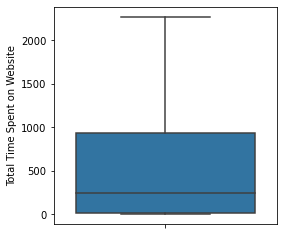

In [38]:
# Ploting 'Total Time Spent on Website'
plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='Total Time Spent on Website', data=lead)
plt.show()

**Observation:**

There is higher variation in Total Time Spent on Website

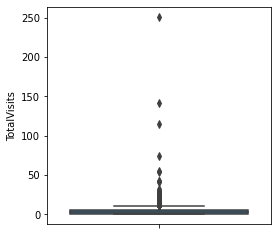

In [39]:
# Ploting 'TotalVisits'
plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='TotalVisits', data=lead)
plt.show()

**Observation:**

There is low variation and lot of outliers in TotalVisits which needs to be treated before modelling

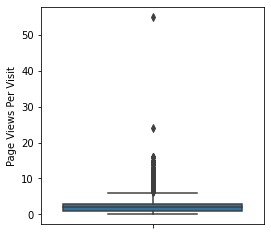

In [40]:
# Ploting 'Page Views Per Visit'
plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='Page Views Per Visit', data=lead)
plt.show()

**Observation:**

There is low variation and lot of outliers in Page Views Per Visit which needs to be treated before modelling.

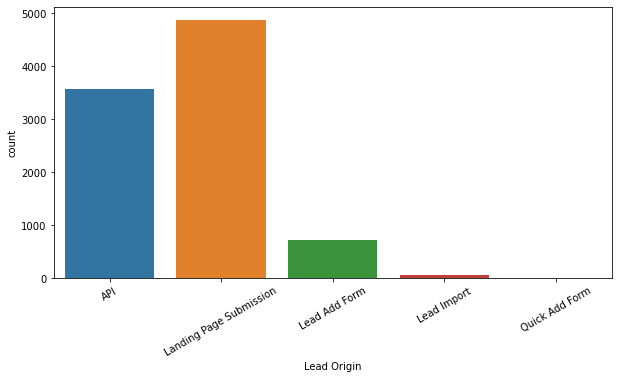

In [41]:
# Ploting 'Lead Origin'

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Lead Origin'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=30)
plt.show()

**Observation**

API and Landing Page Submission bring higher number of leads as well as conversion.

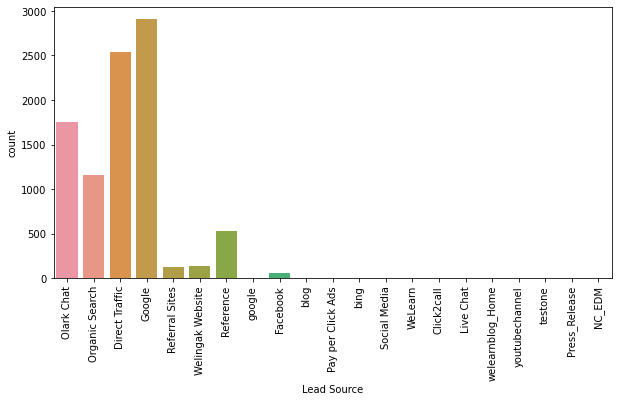

In [42]:
# Ploting 'Lead Source'

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Lead Source'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Observation**

Olark Chat, Organic Search, Direct Taaffic, Google & Reference bring higher number of leads.

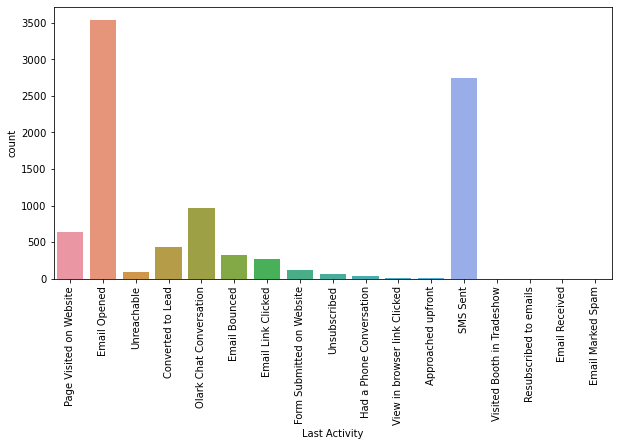

In [43]:
# Ploting 'Last Activity'

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Last Activity'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Observation**

Email Opened & SMS Sent bring higher number of leads.

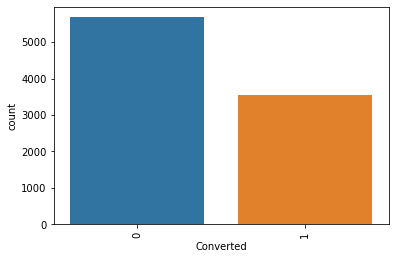

In [44]:
#Ploting 'Converted'

plt.figure(figsize=(6,4))
s1=sns.countplot(lead['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

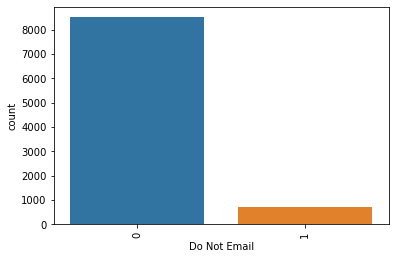

In [45]:
#Ploting 'Do Not Email'

plt.figure(figsize=(6,4))
s1=sns.countplot(lead['Do Not Email'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Bivariate Analysis

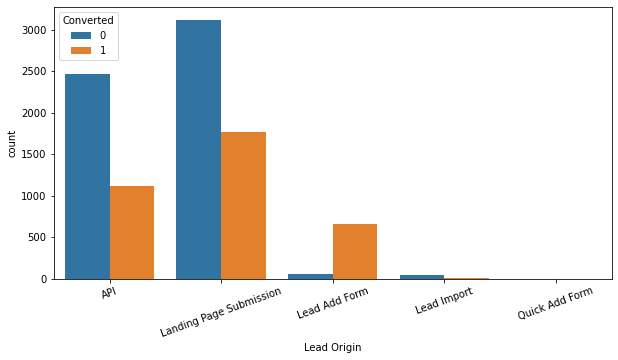

In [46]:
#Ploting 'Lead Origin'
plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Lead Origin'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=20)
plt.show()

**Observation:**

- API and Landing Page Submission has less conversion rate but counts of the leads from them are considerable.
- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high.
- Lead Import has very less count as well as conversion rate, hence can be ignored

**Suggestion**

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

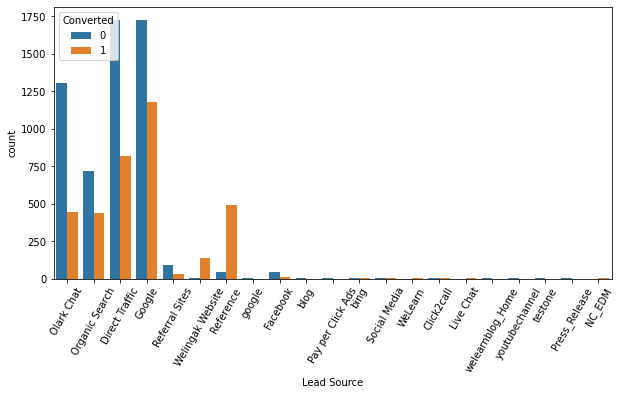

In [47]:
#Ploting 'Lead Source'
plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Lead Source'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
plt.show()

In [48]:
# The count of leads from various sources are close to negligible, we can group them into "Others" source for better visualisation and analysis
# Also there is duplication of 'Google' and 'google' need to handel it

lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

lead['Lead Source'] = lead['Lead Source'].replace("google", 'Google')


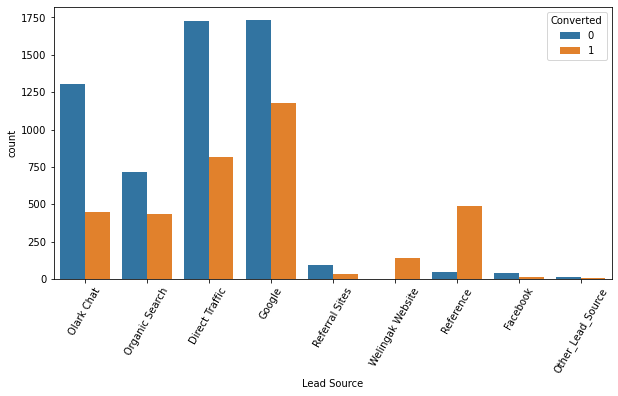

In [49]:
#Ploting 'Lead Source' again

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Lead Source'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
plt.show()


**Observation:**

- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from Reference and Welingak Website is maximum

**Suggestion:**

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

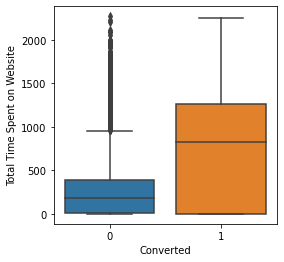

In [50]:
# lets plot the 'Total Time Spent on Website'
plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='Total Time Spent on Website',x = 'Converted', data=lead)
plt.show()

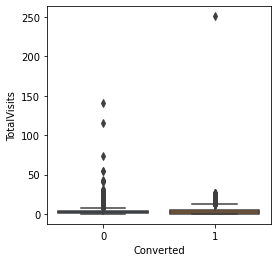

In [51]:
# lets plot the 'TotalVisits'
plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='TotalVisits',x = 'Converted', data=lead)
plt.show()

In [52]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = lead["TotalVisits"].quantile(0.95)
lead["TotalVisits"][lead["TotalVisits"] >= q1] = q1

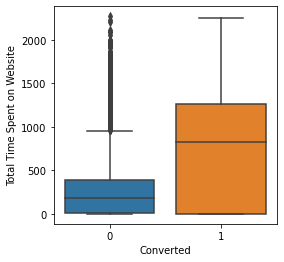

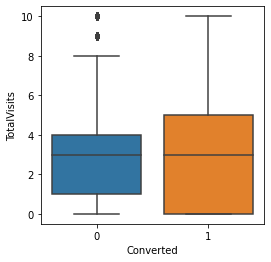

In [53]:
# lets plot again

plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='Total Time Spent on Website',x = 'Converted', data=lead)
plt.show()

plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='TotalVisits',x = 'Converted', data=lead)
plt.show()



**Observation:**

- We didn't get any conclusion from above information since their median of conversion and non-conversion are same.

- Users spending more time on the website are more likely to get converted.

**Suggestion**

Websites can be made more appealing so as to increase the time of the Users on websites

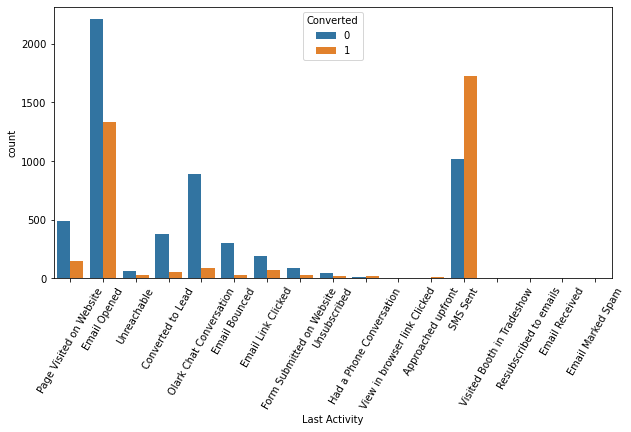

In [54]:
#Ploting 'the Last Activity'

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Last Activity'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
plt.show()

In [55]:
# Converting all the low count categories to the 'Others' category

lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails',
                                                       'Email Received', 'Email Marked Spam'], 'Other Activity')

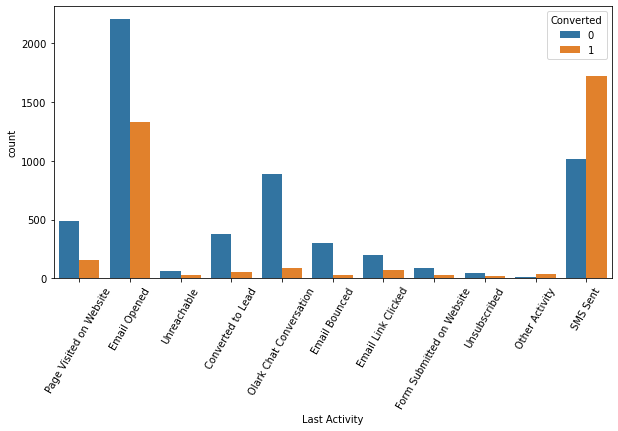

In [56]:
# lets plot the Last Activity again 

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Last Activity'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
plt.show()

**Observation:**

- The count of last activity as "Email Opened" is max
- The conversion rate of SMS sent as last activity is maximum

**Suggestion**

We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent.

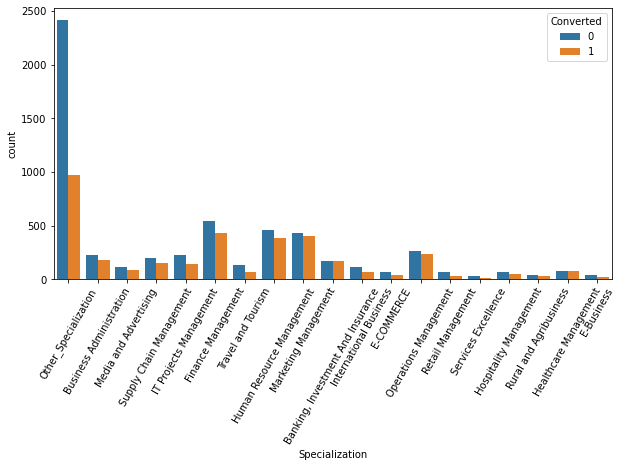

In [57]:
# lets plot the Specialization 

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Specialization'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
plt.show()

**Observation:**

- Looking at above plot, no particular inference can be made for Specialization

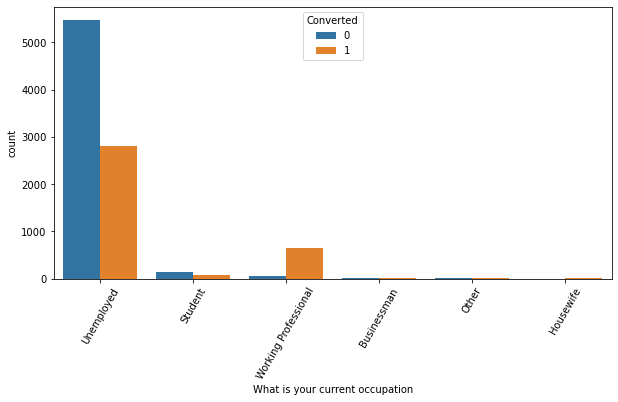

In [58]:
# lets plot the What is your current occupation  column

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['What is your current occupation'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
plt.show()

**Observation:**


Looking at above plot, we can say that working professionals have high conversion rate also Number of Unemployed leads are more than any other category.

**Suggestion**

Need to increase the conversion rate of Unemployed leads also we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc.

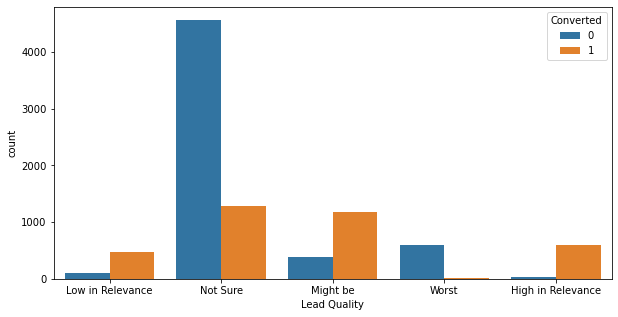

In [59]:
# lets plot the Lead Quality column

plt.figure(figsize=(10,5))
s1=sns.countplot(lead['Lead Quality'], hue=lead.Converted)
plt.show()

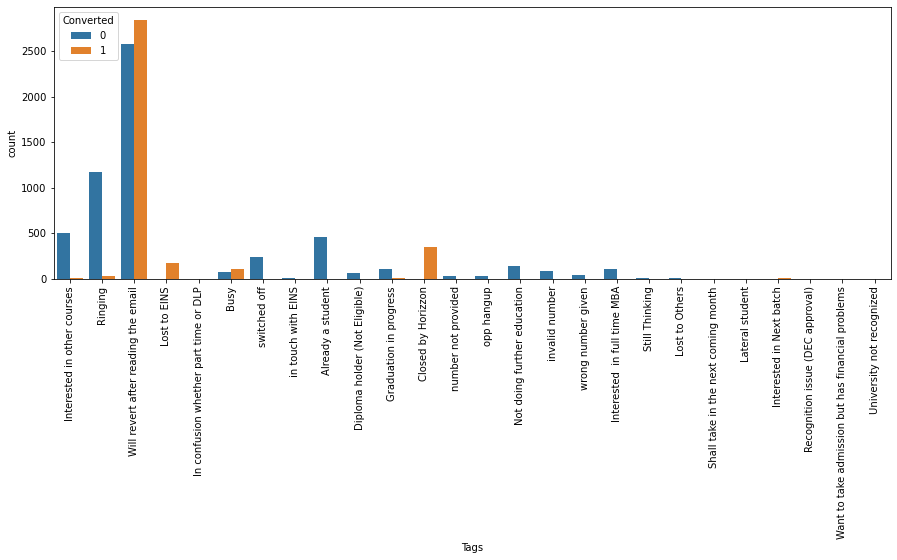

In [60]:
# lets plot the Tags column

plt.figure(figsize=(15,5))
s1=sns.countplot(lead['Tags'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [61]:
# Converting all low count categories to Others category
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

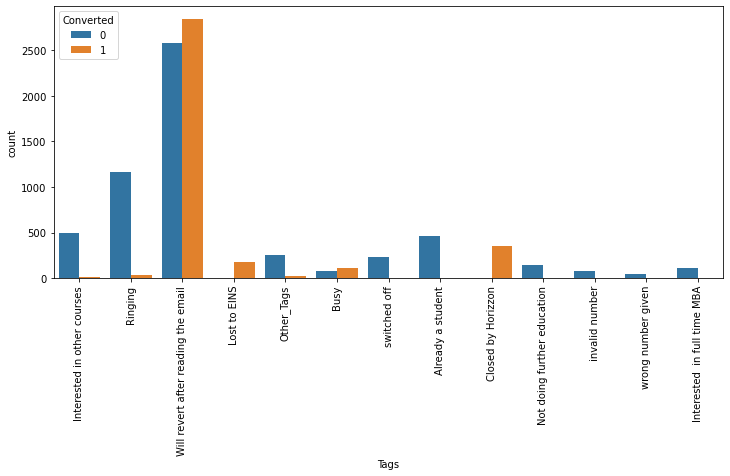

In [62]:
# lets plot the Tags column again

plt.figure(figsize=(12,5))
s1=sns.countplot(lead['Tags'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**OBSERVATION:**

- 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

In [63]:
#We also observed that Country columns do not contribute towards any inference, we can remove them from further analysis
lead = lead.drop(['Country','What matters most to you in choosing a course','A free copy of Mastering The Interview'],1)

In [64]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Dummy Variable Creation

In [65]:
#getting dummies and dropping the first column

dummy_Var = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)

In [66]:
#Drop the column from dataframe

lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)

In [67]:
# adding the results to the master dataframe

lead = pd.concat([lead, dummy_Var], axis=1)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Test-Train Split Data

We are using train-test split procedure which used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. 

Which is allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

In [68]:
# Putting feature variable to X

X = lead.drop(['Converted'], axis=1)

# Putting response variable to y

y = lead['Converted']


In [69]:
print(X)

      Do Not Email  TotalVisits  Total Time Spent on Website  \
0                0          0.0                            0   
1                0          5.0                          674   
2                0          2.0                         1532   
3                0          1.0                          305   
4                0          2.0                         1428   
...            ...          ...                          ...   
9235             1          8.0                         1845   
9236             0          2.0                          238   
9237             1          2.0                          199   
9238             0          3.0                          499   
9239             0          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00    

In [70]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64


In [71]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

Feature scaling is one of the important pre-processing requird for standardizing the input data when the range of values are very distinct in column, we need to scale them to the common level like 0 to 1.

In [72]:
#Apply feature scaling method for accurate result of predictions

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-1.152121,-0.885371,-1.088305,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.297240,0.005716,-0.473232,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.659580,-0.691418,0.067847,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.659580,1.365219,1.223999,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,-1.152121,-0.885371,-1.088305,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
# Checking the Conversion Rate

print("Conversion rate is ", (sum(lead['Converted'])/len(lead['Converted'].index))*100)

Conversion rate is  38.53896103896104


### Looking at Correlations

<AxesSubplot:>

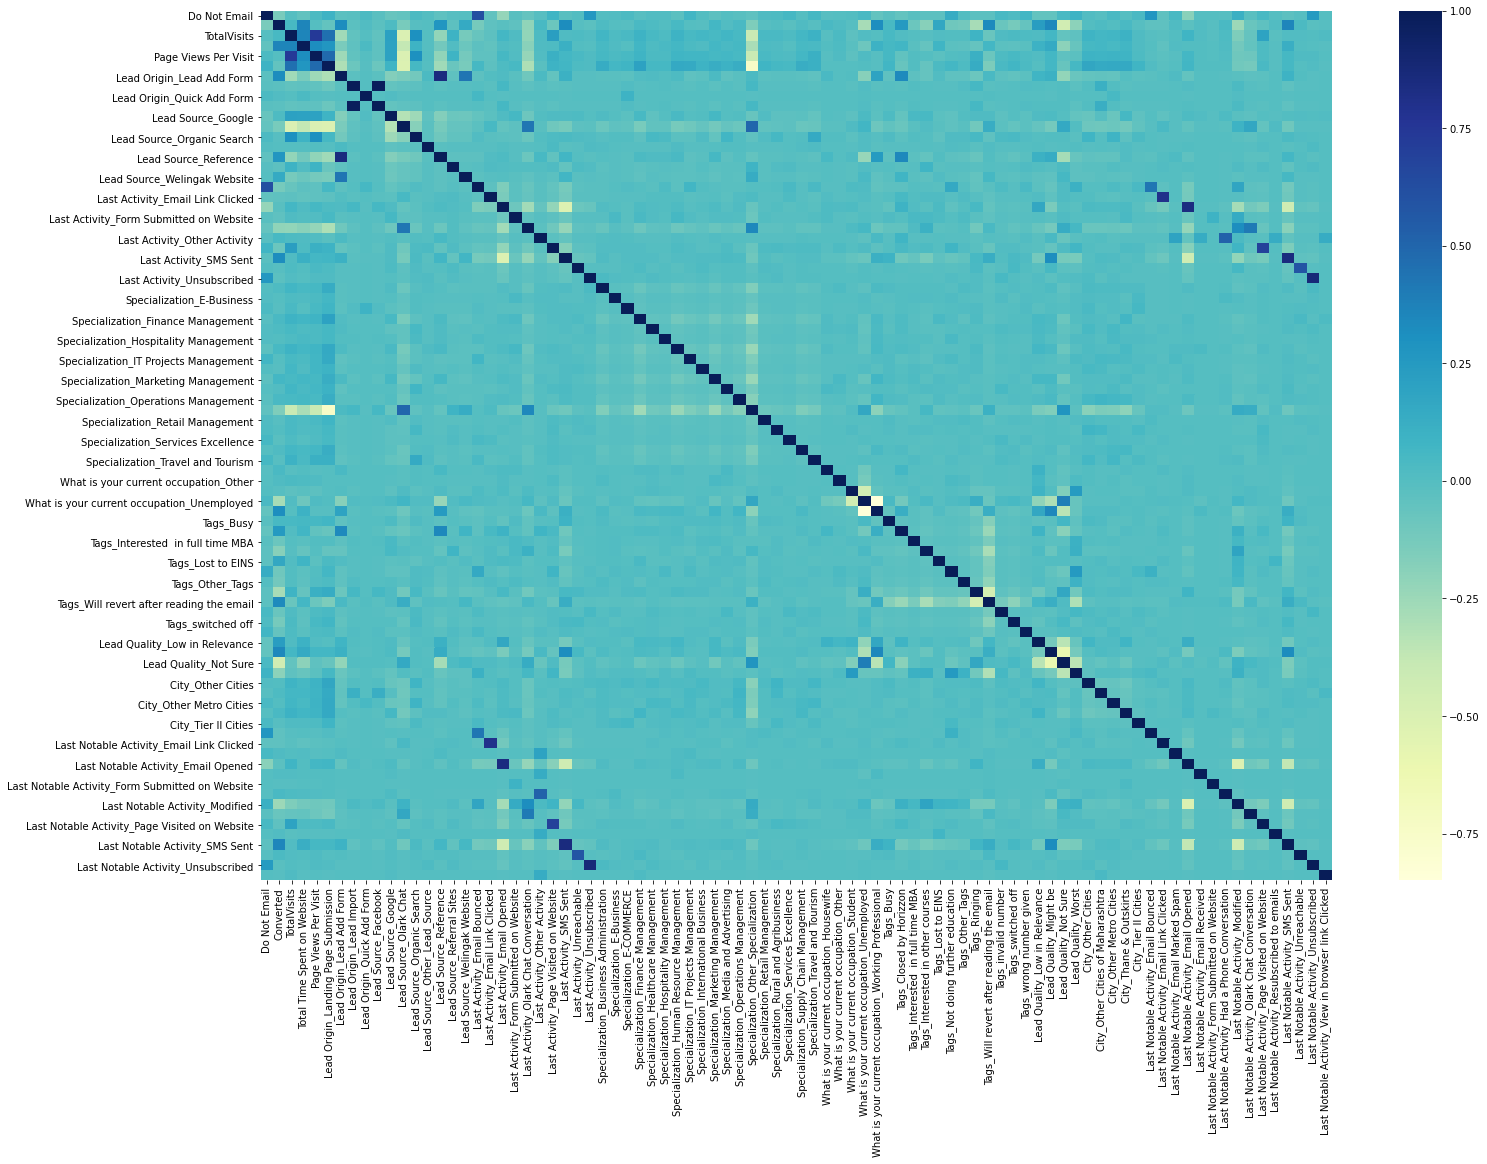

In [74]:
# Visualizing the correlation between all set of usable columns

plt.figure(figsize=(24, 16))
sns.heatmap(lead.corr(), cmap="YlGnBu")

Correlation Analysis (Heatmap) Conclusion: The heatmap is not very clear due to huge number of columns

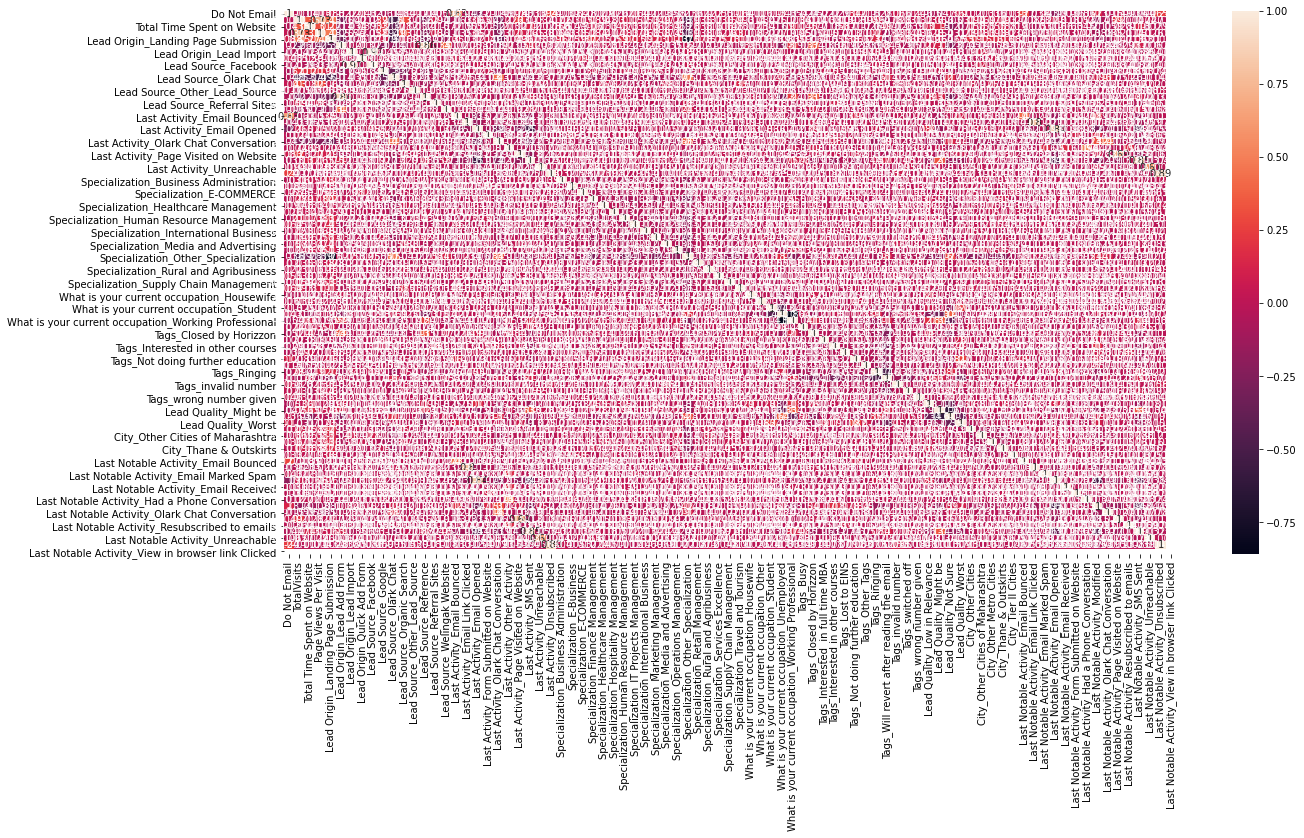

In [75]:
# Correlation between different variables
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model Building

Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [76]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 May 2021   Deviance:                          nan
Time:                        13:38:20   Pearson chi2:                 3.14e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.869e+15   2.87e+07  -6.52e+07      0.000   -1.87e+15   -1.87e+15
Do Not Email                                         -1.804e+14   4.44e+06  -4.06e+07      0.000    -1.8e+14    -1.8e+14
TotalVisits                                           5.435e+13    1.4e+06   3.89e+07      0.000    5.44e+13    5.44e+13
Total Time Spent on Website                           2.505e+14   9.99e+05   2.51e+08      0.000     2.5e+14     2.5e+14
Page Views Per Visit                                 -3.205e+13   1.33e+06  -2.41e+07      0.000   -3.21e+13   -3.21e+13
Lead Origin_Landing Page Submission                  -3.195e+14    3.4e+06   -9.4e+07      0.000   -3.19e+14   -3.19e+14
Lead Origin_Lead Add Form                             3.852e+14   1.23e+07   3.14e+07      0.000    3.85e+14    3.85e+14
Lead Origin_Lead Import                               1.142e+15   4.82e+07   2.37e+07      0.000    1.14e+15    1.14e+15
Lead Origin_Quick Add Form                            3.837e+15    6.8e+07   5.64e+07      0.000    3.84e+15    3.84e+15
Lead Source_Facebook                                 -1.174e+15   4.82e+07  -2.44e+07      0.000   -1.17e+15   -1.17e+15
Lead Source_Google                                    7.921e+12   2.45e+06   3.23e+06      0.000    7.92e+12    7.92e+12
Lead Source_Olark Chat                                3.692e+14   3.85e+06   9.58e+07      0.000    3.69e+14    3.69e+14
Lead Source_Organic Search                            2.484e+13   3.22e+06   7.71e+06      0.000    2.48e+13    2.48e+13
Lead Source_Other_Lead_Source                        -8.211e+13   1.63e+07  -5.03e+06      0.000   -8.21e+13   -8.21e+13
Lead Source_Reference                                -1.483e+14   1.28e+07  -1.16e+07      0.000   -1.48e+14   -1.48e+14
Lead Source_Referral Sites                            6.269e+12   7.55e+06    8.3e+05      0.000    6.27e+12    6.27e+12
Lead Source_Welingak Website                          6.865e+14   1.42e+07   4.85e+07      0.000    6.87e+14    6.87e+14
Last Activity_Email Bounced                          -2.409e+14   7.53e+06   -3.2e+07      0.000   -2.41e+14   -2.41e+14
Last Activity_Email Link Clicked                      4.765e+14   9.35e+06   5.09e+07      0.000    4.77e+14    4.77e+14
Last Activity_Email Opened                             1.46e+13   5.21e+06    2.8e+06      0.000    1.46e+13    1.46e+13
Last Activity_Form Submitted on Website               2.011e+14    8.6e+06   2.34e+07      0.000    2.01e+14    2.01e+14
Last Activity_Olark Chat Conversation                 3.503e+13   5.24e+06   6.68e+06      0.000     3.5e+13     3.5e+13
Last Activity_Other Activity                          3.32

In [77]:
# Starting with features selected by RFE
logreg = LogisticRegression()

In [78]:
# We will then optimize the model further by inspecting VIF and p-value of the features

rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 50),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 34),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 56),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 62),
 ('Lead Source_Other_Lead_Source', False, 52),
 ('Lead Source_Reference', False, 31),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 42),
 ('Last Activity_Email Opened', False, 44),
 ('Last Activity_Form Submitted on Website', False, 43),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other Activity', False, 26),
 ('Last Activity_Page Visited on Website', False, 55)

In [81]:
col = X_train.columns[rfe.support_]

#### Assessing the model with StatsModels

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.4
Date:                Mon, 17 May 2021   Deviance:                       3190.7
Time:                        13:38:32   Pearson chi2:                 3.93e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2723      0.213     -5.979      0.000      -1.689      -0.855
Lead Origin_Lead Add Form                                0.9246      0.298      3.104      0.002       0.341       1.508
Lead Source_Welingak Website                             3.4384      0.802      4.285      0.000       1.866       5.011
Last Activity_SMS Sent                                   1.9444      0.101     19.293      0.000       1.747       2.142
What is your current occupation_Working Professional     1.3583      0.280      4.852      0.000       0.810       1.907
Tags_Busy                                                3.5195      0.312     11.276      0.000       2.908       4.131
Tags_Closed by Horizzon                                  9.2386      1.048      8.818      0.000       7.185      11.292
Tags_Lost to EINS                                        9.4281      0.756     12.463      0.000       7.945      10.911
Tags_Ringing                                            -1.7396      0.311     -5.596      0.000      -2.349      -1.130
Tags_Will revert after reading the email                 3.6264      0.225     16.100      0.000       3.185       4.068
Tags_invalid number                                     -2.1075      1.106     -1.906      0.057      -4.275       0.060
Tags_switched off                                       -2.4517      0.576     -4.254      0.000      -3.581      -1.322
Lead Quality_Not Sure                                   -3.3695      0.133    -25.248      0.000      -3.631      -3.108
Lead Quality_Worst                                      -3.4639      0.685     -5.059      0.000      -4.806      -2.122
Last Notable Activity_Modified                          -1.6610      0.104    -15.943      0.000      -1.865      -1.457
Last Notable Activity_Olark Chat Conversation           -1.3214      0.363     -3.645      0.000      -2.032      -0.611
========================================================================================================================
"""

In [83]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.001690
6795    0.265926
3516    0.001690
8105    0.255872
3934    0.064382
4844    0.996518
3297    0.001690
8071    0.999814
987     0.064382
7423    0.986593
dtype: float64

In [84]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00168987, 0.26592586, 0.00168987, 0.25587237, 0.06438186,
       0.99651846, 0.00168987, 0.99981374, 0.06438186, 0.98659311])

#### Creating a dataframe with the true convertion status and the predicted probabilities

In [85]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.001690,1871
1,0,0.265926,6795
2,0,0.001690,3516
3,0,0.255872,8105
4,0,0.064382,3934


#### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [86]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.001690,1871,0
1,0,0.265926,6795,0
2,0,0.001690,3516,0
3,0,0.255872,8105,0
4,0,0.064382,3934,0


In [87]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3844  158]
 [ 358 2108]]


In [88]:
# Predicted           non_convertion    convertion
# Actual
# non_convertion       3844              158
# convertion            358              2108  

In [89]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.9202226345083488


#### Checking VIFs

In [90]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.28
1,Lead Source_Welingak Website,1.27
10,Tags_switched off,1.12
4,Tags_Busy,1.11
6,Tags_Lost to EINS,1.06
14,Last Notable Activity_Olark Chat Conversation,1.05
9,Tags_invalid number,1.03
3,What is your current occupation_Working Profes...,0.62
12,Lead Quality_Worst,0.42
8,Tags_Will revert after reading the email,0.15


All variables have a good value of VIF. But we observed earlier that the column "Tags_invalid number" has high p-value and hence we will drop this column and remake the model.

In [92]:
col = col.drop('Tags_invalid number')
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [93]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.1
Date:                Mon, 17 May 2021   Deviance:                       3196.2
Time:                        13:38:33   Pearson chi2:                 3.89e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3925      0.211     -6.610      0.000      -1.805      -0.980
Lead Origin_Lead Add Form                                0.9367      0.298      3.139      0.002       0.352       1.522
Lead Source_Welingak Website                             3.4212      0.802      4.265      0.000       1.849       4.994
Last Activity_SMS Sent                                   1.9279      0.100     19.223      0.000       1.731       2.124
What is your current occupation_Working Professional     1.3766      0.282      4.886      0.000       0.824       1.929
Tags_Busy                                                3.6439      0.310     11.763      0.000       3.037       4.251
Tags_Closed by Horizzon                                  9.3426      1.048      8.919      0.000       7.290      11.396
Tags_Lost to EINS                                        9.5364      0.756     12.611      0.000       8.054      11.019
Tags_Ringing                                            -1.6079      0.308     -5.220      0.000      -2.212      -1.004
Tags_Will revert after reading the email                 3.7438      0.223     16.772      0.000       3.306       4.181
Tags_switched off                                       -2.3181      0.575     -4.035      0.000      -3.444      -1.192
Lead Quality_Not Sure                                   -3.3646      0.133    -25.260      0.000      -3.626      -3.104
Lead Quality_Worst                                      -3.4741      0.685     -5.071      0.000      -4.817      -2.131
Last Notable Activity_Modified                          -1.6506      0.104    -15.871      0.000      -1.854      -1.447
Last Notable Activity_Olark Chat Conversation           -1.3204      0.363     -3.642      0.000      -2.031      -0.610
========================================================================================================================
"""

In [94]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [95]:
y_train_pred[:10]

array([0.0017179 , 0.26634099, 0.0017179 , 0.25494307, 0.06514004,
       0.99651534, 0.0017179 , 0.99981829, 0.06514004, 0.98633622])

In [96]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [97]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.001718,1871,0
1,0,0.266341,6795,0
2,0,0.001718,3516,0
3,0,0.254943,8105,0
4,0,0.065140,3934,0


In [98]:
# Let's check the overall accuracy.

print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9197588126159555


The accuracy is still practically the same.

#### Let's now check the VIFs again

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.28
1,Lead Source_Welingak Website,1.27
9,Tags_switched off,1.12
4,Tags_Busy,1.11
6,Tags_Lost to EINS,1.06
13,Last Notable Activity_Olark Chat Conversation,1.05
3,What is your current occupation_Working Profes...,0.62
11,Lead Quality_Worst,0.42
8,Tags_Will revert after reading the email,0.15
7,Tags_Ringing,0.14


All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [100]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3841,  161],
       [ 358, 2108]], dtype=int64)

In [101]:
# Actual/Predicted     not_convertion    convertion
# non_convertion        3269              366
# convertion            595               692  

In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.9197588126159555

#### Metrics beyond simply accuracy

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8548256285482563

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.9597701149425287

In [106]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.040229885057471264


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.9290436315557514


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9147416051440819


#### Plotting the ROC Curve

An ROC curve:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

Here, our goal is to have achieve good sensitivity score

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

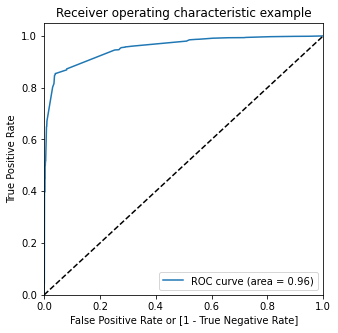

In [111]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [112]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001718,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.266341,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001718,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.254943,8105,0,1,1,1,0,0,0,0,0,0,0
4,0,0.065140,3934,0,1,0,0,0,0,0,0,0,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score'])

In [114]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

In [115]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability_score  accuracy_score  sensitivity_score  specificity_score
0.0                0.0        0.381262           1.000000           0.000000
0.1                0.1        0.800402           0.958232           0.703148
0.2                0.2        0.811379           0.954988           0.722889
0.3                0.3        0.901515           0.872668           0.919290
0.4                0.4        0.919295           0.855231           0.958771
0.5                0.5        0.919759           0.854826           0.959770
0.6                0.6        0.918677           0.850365           0.960770
0.7                0.7        0.905844           0.802109           0.969765
0.8                0.8        0.870439           0.678021           0.989005
0.9                0.9        0.861163           0.650446           0.991004


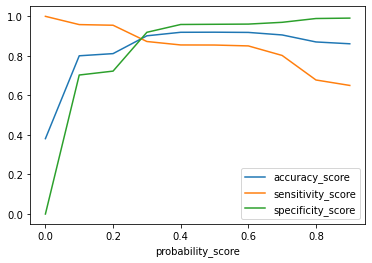

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [117]:
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Convert_predicted
0,0,0.001718,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.266341,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.001718,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.254943,8105,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.065140,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted)

0.9015151515151515

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted )
confusion2

array([[3679,  323],
       [ 314, 2152]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8726682887266829

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.9192903548225887

In [123]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.08070964517741129


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8694949494949495


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9213623841723015


### Precision and Recall

In [126]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted )
confusion

array([[3679,  323],
       [ 314, 2152]], dtype=int64)

#### Precision
TP / TP + FP

In [127]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8694949494949495

#### Recall
TP / TP + FN

In [128]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8726682887266829

Using sklearn utilities for the same

In [129]:
?precision_score

In [130]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted)

0.8694949494949495

In [131]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted)

0.8726682887266829

#### Precision and recall tradeoff

In [132]:
y_train_pred_final.Convert, y_train_pred_final.Convert_Prob

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Convert, Length: 6468, dtype: int64,
 0       0.001718
 1       0.266341
 2       0.001718
 3       0.254943
 4       0.065140
           ...   
 6463    0.964017
 6464    0.953208
 6465    0.266341
 6466    0.045519
 6467    0.065140
 Name: Convert_Prob, Length: 6468, dtype: float64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

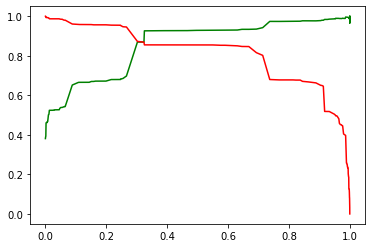

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [135]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,-0.298654,1.736414,0.933036,2.668018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,-0.298654,-1.157722,-0.900812,-1.133290,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,-0.298654,0.651113,-0.793792,1.242527,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,-0.298654,-1.157722,-0.900812,-1.133290,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,-0.298654,-1.157722,-0.900812,-1.133290,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [136]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2376,1,0,1,0,0,0,0,0,1,0,0,0,0,0
7766,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4359,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [137]:
X_test_sm = sm.add_constant(X_test)

### Prediction on Test

In [138]:
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:10]

4269    0.713948
2376    0.994600
7766    0.976523
9199    0.001646
4359    0.964017
9186    0.986336
1631    0.913041
8963    0.913041
8007    0.065140
5324    0.986336
dtype: float64

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
# Let's see the head
y_pred_1.head()

,0
4269,0.713948
2376,0.994600
7766,0.976523
9199,0.001646
4359,0.964017


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.713948
1,1,2376,0.994600
2,1,7766,0.976523
3,0,9199,0.001646
4,1,4359,0.964017


In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [148]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.713948
1,1,2376,0.994600
2,1,7766,0.976523
3,0,9199,0.001646
4,1,4359,0.964017


In [149]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.713948,71
1,2376,1,0.994600,99
2,7766,1,0.976523,98
3,9199,0,0.001646,0
4,4359,1,0.964017,96


In [151]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.27 else 0)

In [152]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.713948,71,1
1,2376,1,0.994600,99,1
2,7766,1,0.976523,98,1
3,9199,0,0.001646,0,0
4,4359,1,0.964017,96,1


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8993506493506493

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1530,  147],
       [ 132,  963]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8794520547945206

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.9123434704830053

In [158]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8675675675675676

In [159]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8794520547945206

**Final Observation:**


Train Data: 
    
- Accuracy : 90.15%
- Sensitivity : 87.26%
- Specificity : 91.92%
    
Test Data: 
    
- Accuracy : 89.93%
- Sensitivity : 87.94%
- Specificity : 93.23%

Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead and any lead with 0.27 or less probability of converting is predicted as Cold Lead

In [160]:
#Features used in Final Model
print(res.params)

const                                                  -1.392456
Lead Origin_Lead Add Form                               0.936719
Lead Source_Welingak Website                            3.421194
Last Activity_SMS Sent                                  1.927904
What is your current occupation_Working Professional    1.376644
Tags_Busy                                               3.643904
Tags_Closed by Horizzon                                 9.342620
Tags_Lost to EINS                                       9.536355
Tags_Ringing                                           -1.607869
Tags_Will revert after reading the email                3.743800
Tags_switched off                                      -2.318122
Lead Quality_Not Sure                                  -3.364611
Lead Quality_Worst                                     -3.474128
Last Notable Activity_Modified                         -1.650590
Last Notable Activity_Olark Chat Conversation          -1.320357
dtype: float64


The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Lead Quality_Worst’ with respect to the absolute value of their coefficient factors.

- The final model has Sensitivity of 0.879, this means the model is able to predict 88% customers out of all the converted customers, (Positive conversion) correctly.

- The final model has Precision of 0.86, this means 86% of predicted hot leads are True Hot Leads.